In [0]:
# Instala o PySpark
#!pip install -q pyspark

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyspark
from pyspark.sql import SparkSession
from pyspark.ml.fpm import FPGrowth
from pyspark.sql import SQLContext
from pyspark.sql.functions import col, round
from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

# Carregas os dados
dados = pd.read_csv("/dbfs/FileStore/shared_uploads/eric.passos@dataside.com.br/DataCoSupplyChainDataset.csv", encoding = 'latin1')

# Colunas
dados.columns

Out[1]: Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
 'Benefit per order', 'Sales per customer', 'Delivery Status',
 'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
 'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
 'Customer Lname', 'Customer Password', 'Customer Segment',
 'Customer State', 'Customer Street', 'Customer Zipcode',
 'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
 'Order City', 'Order Country', 'Order Customer Id',
 'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
 'Order Item Product Price', 'Order Item Profit Ratio',
 'Order Item Quantity', 'Sales', 'Order Item Total',
 'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
 'Order Zipcode', 'Product Card Id', 'Product Category Id',
 'Product Description', 'Product Image', 'Product Name', 'Product Price',
 'Product Status', 'shipping date (DateOrders)', 'Shipping Mode'],
 dtype='object')

In [0]:
# Amostra dos dados
dados.head()

Out[2]:

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [0]:
# Info
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 Type 180519 non-null object 
 1 Days for shipping (real) 180519 non-null int64 
 2 Days for shipment (scheduled) 180519 non-null int64 
 3 Benefit per order 180519 non-null float64
 4 Sales per customer 180519 non-null float64
 5 Delivery Status 180519 non-null object 
 6 Late_delivery_risk 180519 non-null int64 
 7 Category Id 180519 non-null int64 
 8 Category Name 180519 non-null object 
 9 Customer City 180519 non-null object 
 10 Customer Country 180519 non-null object 
 11 Customer Email 180519 non-null object 
 12 Customer Fname 180519 non-null object 
 13 Customer Id 180519 non-null int64 
 14 Customer Lname 180511 non-null object 
 15 Customer Password 180519 non-null object 
 16 Customer Segment 180519 non-null object 
 17 Customer State 180519 non-null object 
 18 Customer Street 180519 non-null object 
 19 Customer Zipcode 180516 non-null float64
 20 Department Id 180519 non-null int64 
 21 Department Name 180519 non-null object 
 22 Latitude 180519 non-null float64
 23 Longitude 180519 non-null float64
 24 Market 180519 non-null object 
 25 Order City 180519 non-null object 
 26 Order Country 180519 non-null object 
 27 Order Customer Id 180519 non-null int64 
 28 order date (DateOrders) 180519 non-null object 
 29 Order Id 180519 non-null int64 
 30 Order Item Cardprod Id 180519 non-null int64 
 31 Order Item Discount 180519 non-null float64
 32 Order Item Discount Rate 180519 non-null float64
 33 Order Item Id 180519 non-null int64 
 34 Order Item Product Price 180519 non-null float64
 35 Order Item Profit Ratio 180519 non-null float64
 36 Order Item Quantity 180519 non-null int64 
 37 Sales 180519 non-null float64
 38 Order Item Total 180519 non-null float64
 39 Order Profit Per Order 180519 non-null float64
 40 Order Region 180519 non-null object 
 41 Order State 180519 non-null object 
 42 Order Status 180519 non-null object 
 43 Order Zipcode 24840 non-null float64
 44 Product Card Id 180519 non-null int64 
 45 Product Category Id 180519 non-null int64 
 46 Product Description 0 non-null float64
 47 Product Image 180519 non-null object 
 48 Product Name 180519 non-null object 
 49 Product Price 180519 non-null float64
 50 Product Status 180519 non-null int64 
 51 shipping date (DateOrders) 180519 non-null object 
 52 Shipping Mode 180519 non-null object 
dtypes: float64(15), int64(14), object(24)
memory usage: 73.0+ MB

In [0]:
# Verificando valores ausentes
dados.apply(lambda x: sum(x.isnull()))

Out[4]: Type 0
Days for shipping (real) 0
Days for shipment (scheduled) 0
Benefit per order 0
Sales per customer 0
Delivery Status 0
Late_delivery_risk 0
Category Id 0
Category Name 0
Customer City 0
Customer Country 0
Customer Email 0
Customer Fname 0
Customer Id 0
Customer Lname 8
Customer Password 0
Customer Segment 0
Customer State 0
Customer Street 0
Customer Zipcode 3
Department Id 0
Department Name 0
Latitude 0
Longitude 0
Market 0
Order City 0
Order Country 0
Order Customer Id 0
order date (DateOrders) 0
Order Id 0
Order Item Cardprod Id 0
Order Item Discount 0
Order Item Discount Rate 0
Order Item Id 0
Order Item Product Price 0
Order Item Profit Ratio 0
Order Item Quantity 0
Sales 0
Order Item Total 0
Order Profit Per Order 0
Order Region 0
Order State 0
Order Status 0
Order Zipcode 155679
Product Card Id 0
Product Category Id 0
Product Description 180519
Product Image 0
Product Name 0
Product Price 0
Product Status 0
shipping date (DateOrders) 0
Shipping Mode 0
dtype: int64

In [0]:
# Criação de uma nova coluna para o nome do cliente adicionando colunas de nome e sobre nome do cliente
dados['Customer Name'] = dados['Customer Fname'].astype(str) + dados['Customer Lname'].astype(str)

# Removendo colunas que parecem não ser necessárias
dados = dados.drop(['Product Status', 'Customer Password',
                   'Customer Email', 'Customer Street',
                   'Customer Fname', 'Customer Lname',
                   'Latitude', 'Longitude',
                   'Product Image', 'Product Description',
                   'Order Zipcode', 'shipping date (DateOrders)'], axis = 1)

# Atribuindo valor zero para os valores ausentes da coluna 'Customer Zipcode'
dados['Customer Zipcode'] = dados['Customer Zipcode'].fillna(0)

# Verificando valores ausentes
dados.apply(lambda x: sum(x.isnull()))

Out[5]: Type 0
Days for shipping (real) 0
Days for shipment (scheduled) 0
Benefit per order 0
Sales per customer 0
Delivery Status 0
Late_delivery_risk 0
Category Id 0
Category Name 0
Customer City 0
Customer Country 0
Customer Id 0
Customer Segment 0
Customer State 0
Customer Zipcode 0
Department Id 0
Department Name 0
Market 0
Order City 0
Order Country 0
Order Customer Id 0
order date (DateOrders) 0
Order Id 0
Order Item Cardprod Id 0
Order Item Discount 0
Order Item Discount Rate 0
Order Item Id 0
Order Item Product Price 0
Order Item Profit Ratio 0
Order Item Quantity 0
Sales 0
Order Item Total 0
Order Profit Per Order 0
Order Region 0
Order State 0
Order Status 0
Product Card Id 0
Product Category Id 0
Product Name 0
Product Price 0
Shipping Mode 0
Customer Name 0
dtype: int64

Out[6]:

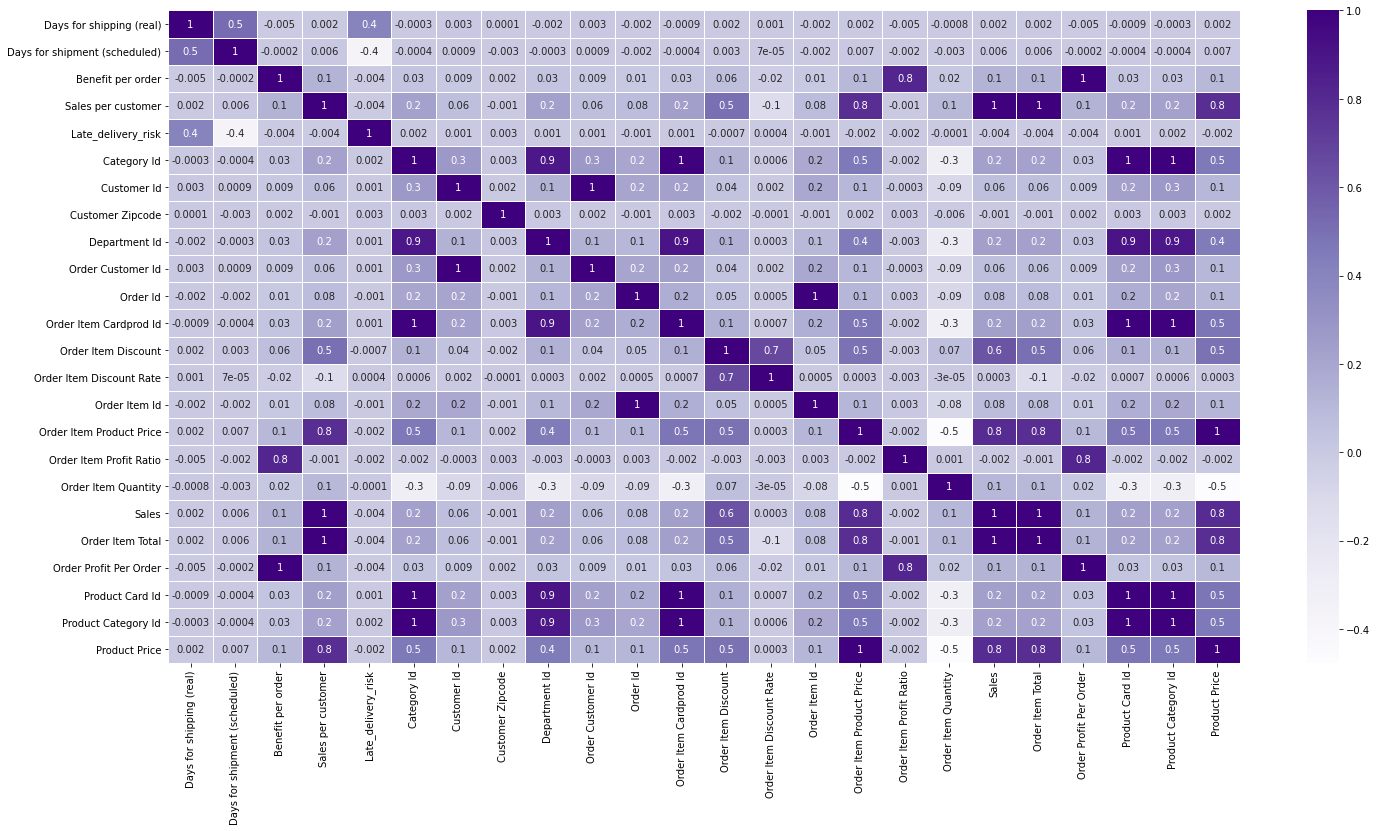

<AxesSubplot:>

In [0]:
# Matriz de correlação para variáveis numéricas
fig, ax = plt.subplots(figsize = (24,12))
sns.heatmap(dados.corr(), annot = True, linewidths = .5, fmt = '.1g', cmap = 'Purples')

Out[7]:

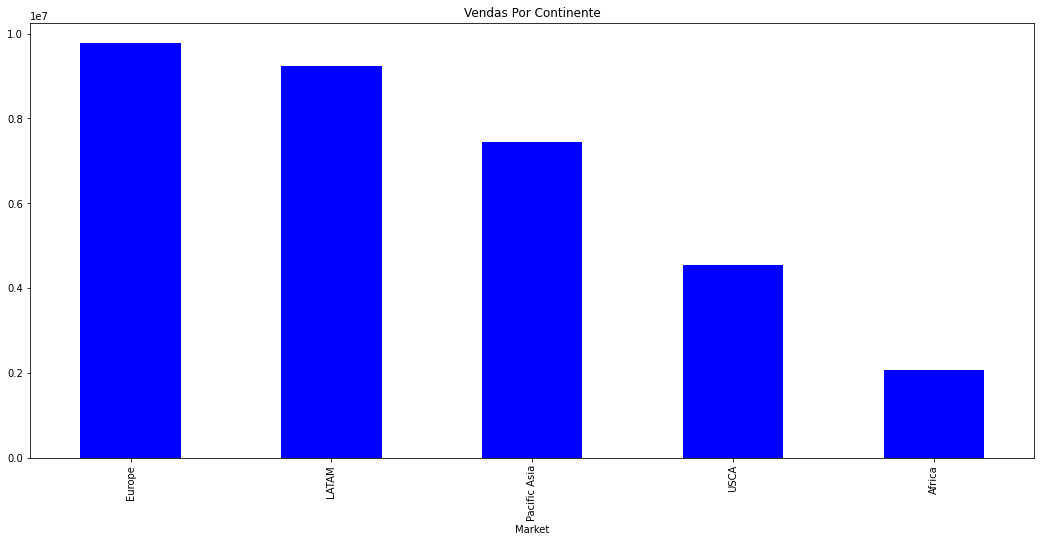

<AxesSubplot:title={'center':'Vendas Por Continente'}, xlabel='Market'>

In [0]:
# Vendas por Região
# Agrupa os dados por continente
grupo_mercado = dados.groupby('Market')

# Plot
plt.figure(1)
grupo_mercado['Sales per customer'].sum().sort_values(ascending = False).plot.bar(figsize = (18,8),
                                                                                 color = ['blue'],
                                                                                 title = "Vendas Por Continente")

Out[8]:

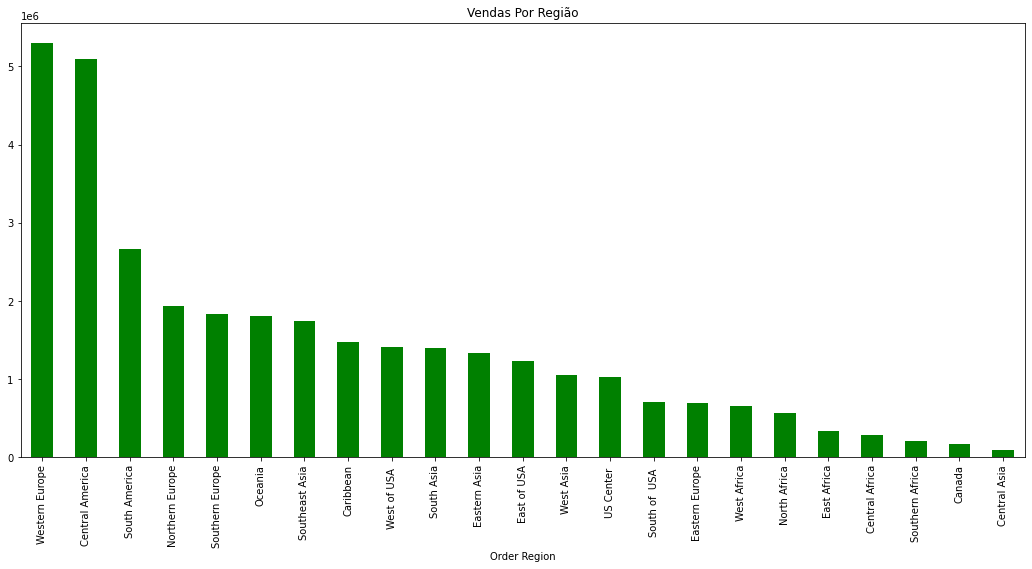

<AxesSubplot:title={'center':'Vendas Por Região'}, xlabel='Order Region'>

In [0]:
# Agrupa por Order Region
grupo_regiao = dados.groupby('Order Region')

#Plot
plt.figure(2)
grupo_regiao['Sales per customer'].sum().sort_values(ascending = False).plot.bar(figsize = (18, 8),
                                                                                color = ['green'],
                                                                                title = 'Vendas Por Região')

Out[10]:

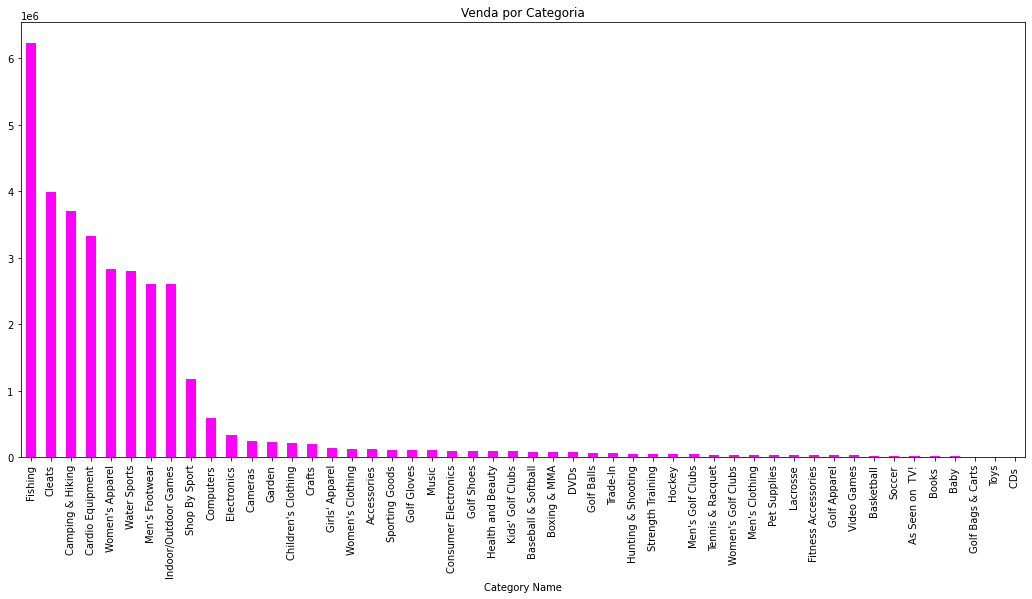

<AxesSubplot:title={'center':'Venda por Categoria'}, xlabel='Category Name'>

In [0]:
# Vendas Produtos
# Agrupa os dados por categoria
categoria = dados.groupby('Category Name')

# Plot
plt.figure(1)
categoria['Sales per customer'].sum().sort_values(ascending = False).plot.bar(figsize = (18,8),
                                                                             color = ['magenta'],
                                                                             title = 'Venda por Categoria')

Out[11]:

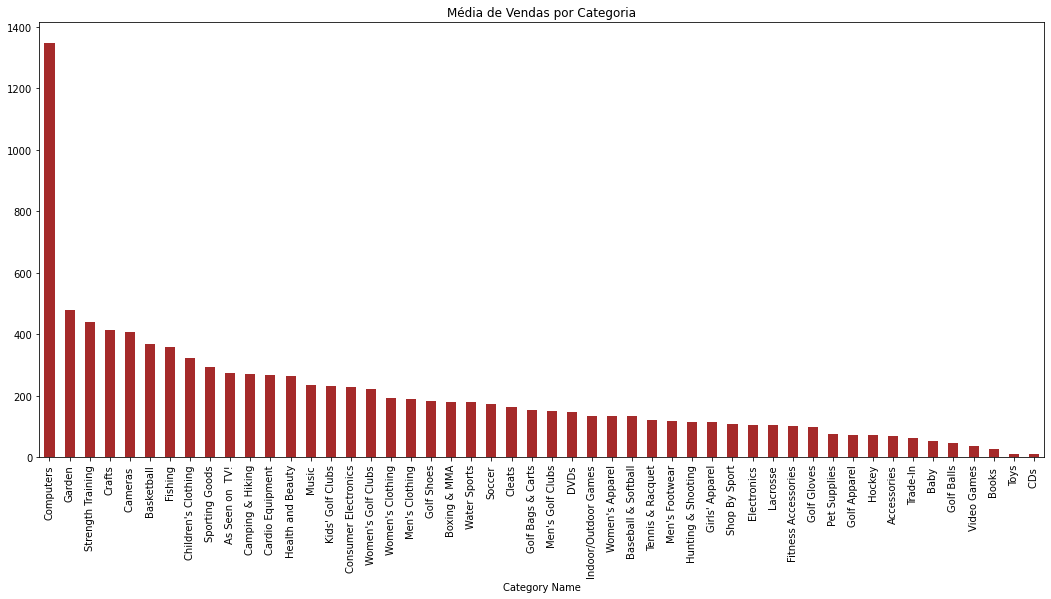

<AxesSubplot:title={'center':'Média de Vendas por Categoria'}, xlabel='Category Name'>

In [0]:
# Vejamos a média de vendas por categoria
# Plot
plt.figure(1)
categoria['Sales per customer'].mean().sort_values(ascending = False).plot.bar(figsize = (18,8),
                                                                             color = ['brown'],
                                                                             title = 'Média de Vendas por Categoria')

Out[12]:

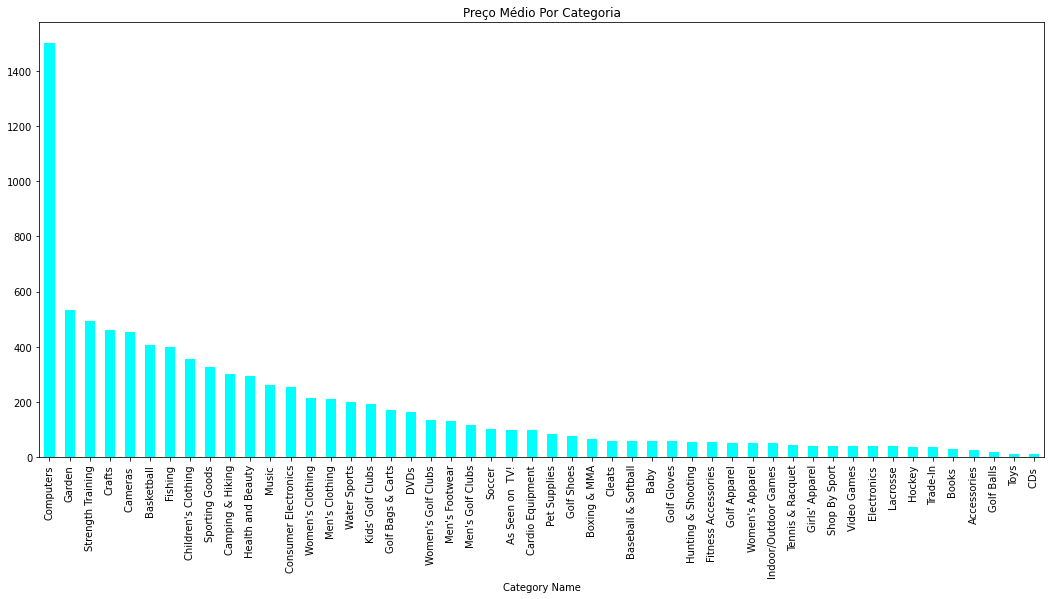

<AxesSubplot:title={'center':'Preço Médio Por Categoria'}, xlabel='Category Name'>

In [0]:
# Preço Médio de venda por categoria
plt.figure(3)
categoria['Product Price'].mean().sort_values(ascending = False).plot.bar(figsize = (18,8),
                                                                          color = ['cyan'],
                                                                          title = "Preço Médio Por Categoria")

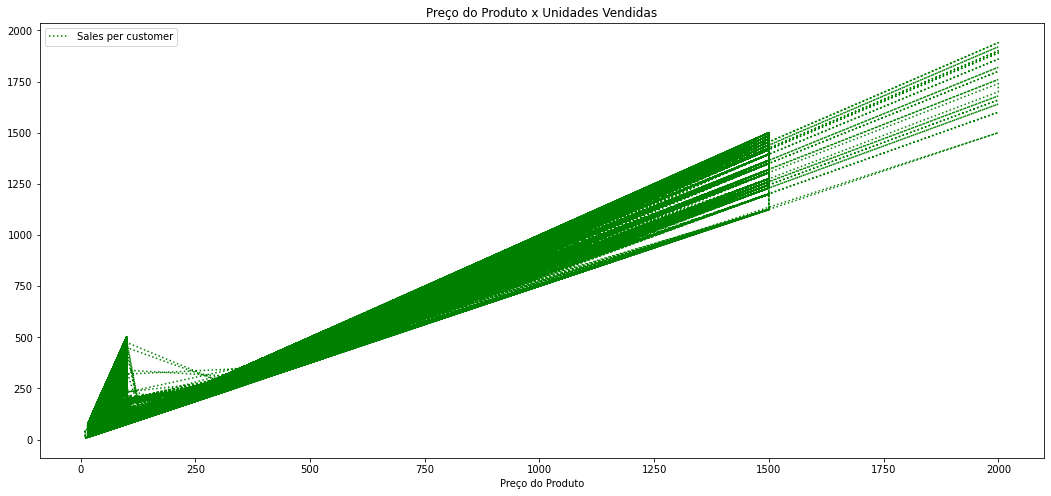

In [0]:
# Relação entre o preço do produto e unidades vendidas
# Plot
dados.plot(x = 'Product Price',
          y = 'Sales per customer',
          linestyle = 'dotted',
          markerfacecolor = 'blue',
          color = ['green'],
          figsize = (18,8))
plt.title('Preço do Produto x Unidades Vendidas')
plt.xlabel('Preço do Produto')
plt.show()

In [0]:
# Vamos associar clientes e produtos
df = dados.copy()
df = df[['Customer Name', 'Product Name']]
df = df.drop_duplicates(['Customer Name', 'Product Name'])
df = df.groupby('Customer Name')['Product Name'].apply(list).reset_index(name = "Products")

# Cria sessão Spark
spark = SparkSession.builder.master("local").appName("Eric").config('spark.ui.port', '4050').getOrCreate()

# Cria o SQL Context
sqlContext = SQLContext(spark)

# Converte o dataframe
df_spark_frame = sqlContext.createDataFrame(df)

/databricks/spark/python/pyspark/sql/context.py:82: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
 warnings.warn(

In [0]:
# Crie o objeto fgpGrowth instanciando o construtor FPGrowth com os parâmetros necessários
fpGrowth = FPGrowth(itemsCol = "Products", minSupport = 0.015, minConfidence = 0.35)

# Ajusta o Dataframe no objeto fpGrowth para preparar o modelo
modelo = fpGrowth.fit(df_spark_frame)

# Exibi os itens que ocorrem com mais frequência
modelo.freqItemsets.sort('freq', ascending = False).show(truncate = False)

/databricks/spark/python/pyspark/sql/context.py:134: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
 warnings.warn(
+------------------------------------------------------------------------------------+----+
items |freq|
+------------------------------------------------------------------------------------+----+
[Perfect Fitness Perfect Rip Deck] |4851|
[Nike Men's CJ Elite 2 TD Football Cleat] |4711|
[Nike Men's Dri-FIT Victory Golf Polo] |4603|
[O'Brien Men's Neoprene Life Vest] |4505|
[Field & Stream Sportsman 16 Gun Fire Safe] |4304|
[Nike Men's CJ Elite 2 TD Football Cleat, Perfect Fitness Perfect Rip Deck] |4135|
[Pelican Sunstream 100 Kayak] |4108|
[Nike Men's Dri-FIT Victory Golf Polo, Perfect Fitness Perfect Rip Deck] |4030|
[O'Brien Men's Neoprene Life Vest, Perfect Fitness Perfect Rip Deck] |3963|
[Diamondback Women's Serene Classic Comfort Bi] |3937|
[Nike Men's Dri-FIT Victory Golf Polo, Nike Men's CJ Elite 2 TD Football Cleat] |3914|
[O'Brien Men's Neoprene Life Vest, Nike Men's CJ Elite 2 TD Football Cleat] |3832|
[Nike Men's Free 5.0+ Running Shoe] |3803|
[Field & Stream Sportsman 16 Gun Fire Safe, Perfect Fitness Perfect Rip Deck] |3774|
[O'Brien Men's Neoprene Life Vest, Nike Men's Dri-FIT Victory Golf Polo] |3766|
[Field & Stream Sportsman 16 Gun Fire Safe, Nike Men's CJ Elite 2 TD Football Cleat]|3691|
[Pelican Sunstream 100 Kayak, Perfect Fitness Perfect Rip Deck] |3642|
[Field & Stream Sportsman 16 Gun Fire Safe, Nike Men's Dri-FIT Victory Golf Polo] |3619|
[Field & Stream Sportsman 16 Gun Fire Safe, O'Brien Men's Neoprene Life Vest] |3568|
[Under Armour Girls' Toddler Spine Surge Runni] |3563|
+------------------------------------------------------------------------------------+----+
only showing top 20 rows

In [0]:
# Mostra as regras de associação geradas
modelo.associationRules\
.withColumn("confidence", round(col("confidence"), 3))\
.withColumn("lift", round(col("lift"), 3))\
.withColumn("support", round(col("support"), 10))\
.sort('confidence', ascending = False)\
.show(truncate = True)

+--------------------+--------------------+----------+-----+------------+
 antecedent| consequent|confidence| lift| support|
+--------------------+--------------------+----------+-----+------------+
[Team Golf St. Lo...|[Nike Men's CJ El...| 0.982|2.924|0.0151785078|
[Team Golf St. Lo...|[Nike Men's CJ El...| 0.978|2.913|0.0158198532|
[ENO Atlas Hammoc...|[Perfect Fitness ...| 0.977|2.826|0.0150359866|
[Team Golf St. Lo...|[Nike Men's CJ El...| 0.977|2.911|0.0152497684|
[Titleist Pro V1 ...|[Nike Men's CJ El...| 0.977|2.911|0.0153922896|
[Titleist Pro V1 ...|[Perfect Fitness ...| 0.977|2.827|0.0153922896|
[ENO Atlas Hammoc...|[Perfect Fitness ...| 0.974|2.817|0.0158198532|
[Titleist Pro V1 ...|[Nike Men's Dri-F...| 0.973|2.966|0.0153922896|
[Team Golf St. Lo...|[Nike Men's CJ El...| 0.973|2.898| 0.015321029|
[Titleist Pro V1x...|[Perfect Fitness ...| 0.973|2.814| 0.015321029|
[Team Golf St. Lo...|[Nike Men's CJ El...| 0.972|2.896|0.0150359866|
[Glove It Women's...|[O'Brien Men's Ne...| 0.972|3.029|0.0150359866|
[Bridgestone e6 S...|[Nike Men's Dri-F...| 0.972|2.965|0.0151072472|
[Under Armour Gir...|[Perfect Fitness ...| 0.971| 2.81|0.0893607924|
[Team Golf St. Lo...|[Nike Men's CJ El...| 0.971|2.891|0.0164611986|
[Titleist Pro V1 ...|[Nike Men's CJ El...| 0.969|2.888|0.0158198532|
[Titleist Pro V1 ...|[Nike Men's CJ El...| 0.969|2.887|0.0157485926|
[Under Armour Gir...|[Perfect Fitness ...| 0.969|2.804|0.0939927314|
[Titleist Pro V1 ...|[Perfect Fitness ...| 0.969|2.804|0.0157485926|
[Bridgestone e6 S...|[Perfect Fitness ...| 0.968|2.801|0.0151785078|
+--------------------+--------------------+----------+-----+------------+
only showing top 20 rows

Out[17]:

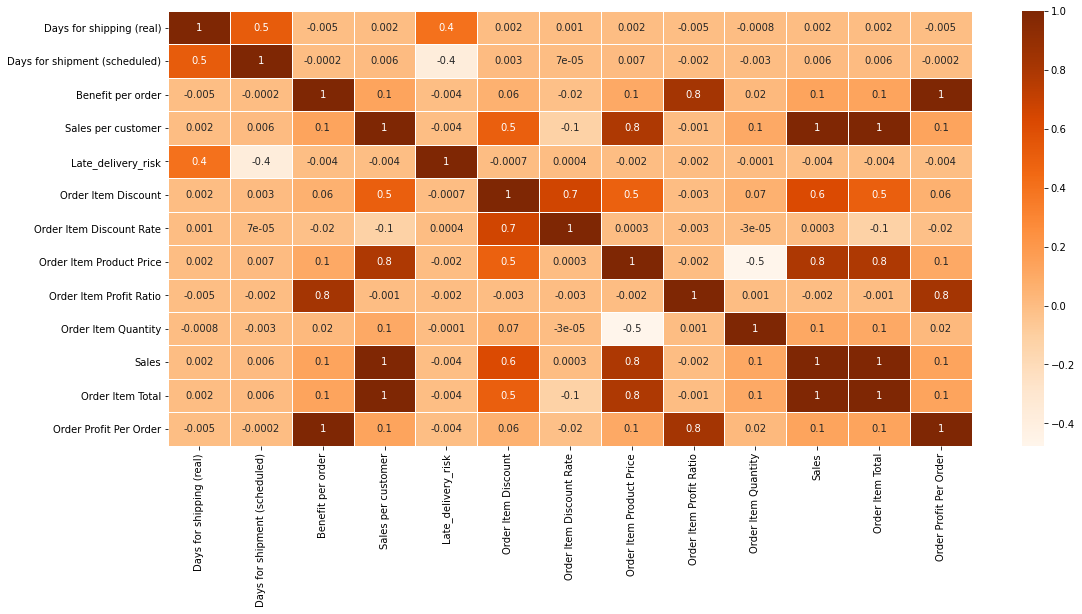

<AxesSubplot:>

In [0]:
# Removendo colunas que não serão usadas
dados = dados.drop(['Product Price', 
                   'Category Id',
                   'Order Id',
                   'Product Category Id',
                   'Order Item Id',
                   'Product Card Id',
                   'Order Item Cardprod Id',
                   'Customer Id',
                   'Order Customer Id',
                   'Department Id',
                   'Customer Zipcode'],
                  axis = 1)

# Correlação entre as variáveis
fig, ax = plt.subplots(figsize = (18,8))
sns.heatmap(dados.corr(), annot = True, linewidths = .5, fmt = '.1g', cmap = 'Oranges')

Out[18]:

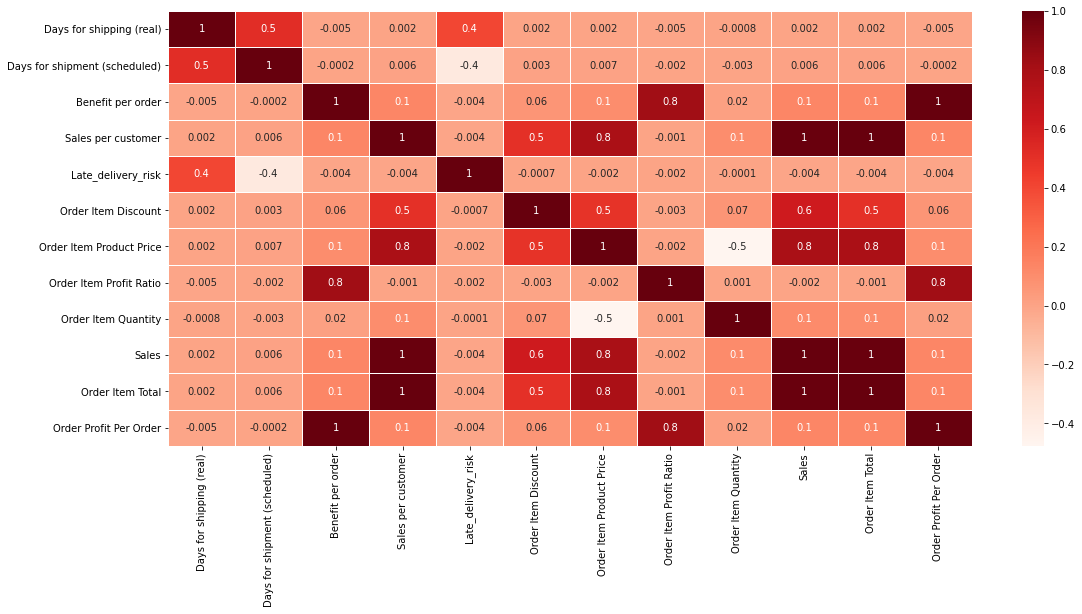

<AxesSubplot:>

In [0]:
# Drop de coluna
dados = dados.drop(['Order Item Discount Rate'], axis = 1)

# Correlação entre as variáveis
ig, ax = plt.subplots(figsize = (18,8))
sns.heatmap(dados.corr(), annot = True, linewidths = .5, fmt = '.1g', cmap = 'Reds')

In [0]:
# Sessão
spark = SparkSession.builder.appName("Eric").getOrCreate()

# Converte o dataframe do pandas para dataframe do Spark
df_supply_chain = spark.createDataFrame(dados)

# Visualiza
df_supply_chain.show(5)

+--------+------------------------+-----------------------------+-----------------+------------------+----------------+------------------+--------------+-------------+----------------+----------------+--------------+---------------+------------+----------+-------------+-----------------------+-------------------+------------------------+-----------------------+-------------------+------+----------------+----------------------+--------------+---------------+---------------+------------+--------------+----------------+
 Type|Days for shipping (real)|Days for shipment (scheduled)|Benefit per order|Sales per customer| Delivery Status|Late_delivery_risk| Category Name|Customer City|Customer Country|Customer Segment|Customer State|Department Name| Market|Order City|Order Country|order date (DateOrders)|Order Item Discount|Order Item Product Price|Order Item Profit Ratio|Order Item Quantity| Sales|Order Item Total|Order Profit Per Order| Order Region| Order State| Order Status|Product Name| Shipping Mode| Customer Name|
+--------+------------------------+-----------------------------+-----------------+------------------+----------------+------------------+--------------+-------------+----------------+----------------+--------------+---------------+------------+----------+-------------+-----------------------+-------------------+------------------------+-----------------------+-------------------+------+----------------+----------------------+--------------+---------------+---------------+------------+--------------+----------------+
 DEBIT| 3| 4| 91.25| 314.6400146|Advance shipping| 0|Sporting Goods| Caguas| Puerto Rico| Consumer| PR| Fitness|Pacific Asia| Bekasi| Indonesia| 1/31/2018 22:56| 13.10999966| 327.75| 0.289999992| 1|327.75| 314.6400146| 91.25|Southeast Asia|Java Occidental| COMPLETE|Smart watch |Standard Class| CallyHolloway|
TRANSFER| 5| 4| -249.0899963| 311.3599854| Late delivery| 1|Sporting Goods| Caguas| Puerto Rico| Consumer| PR| Fitness|Pacific Asia| Bikaner| India| 1/13/2018 12:27| 16.38999939| 327.75| -0.800000012| 1|327.75| 311.3599854| -249.0899963| South Asia| Rajastán| PENDING|Smart watch |Standard Class| IreneLuna|
 CASH| 4| 4| -247.7799988| 309.7200012|Shipping on time| 0|Sporting Goods| San Jose| EE. UU.| Consumer| CA| Fitness|Pacific Asia| Bikaner| India| 1/13/2018 12:06| 18.03000069| 327.75| -0.800000012| 1|327.75| 309.7200012| -247.7799988| South Asia| Rajastán| CLOSED|Smart watch |Standard Class|GillianMaldonado|
 DEBIT| 3| 4| 22.86000061| 304.8099976|Advance shipping| 0|Sporting Goods| Los Angeles| EE. UU.| Home Office| CA| Fitness|Pacific Asia|Townsville| Australia| 1/13/2018 11:45| 22.94000053| 327.75| 0.079999998| 1|327.75| 304.8099976| 22.86000061| Oceania| Queensland| COMPLETE|Smart watch |Standard Class| TanaTate|
 PAYMENT| 2| 4| 134.2100067| 298.25|Advance shipping| 0|Sporting Goods| Caguas| Puerto Rico| Corporate| PR| Fitness|Pacific Asia|Townsville| Australia| 1/13/2018 11:24| 29.5| 327.75| 0.449999988| 1|327.75| 298.25| 134.2100067| Oceania| Queensland|PENDING_PAYMENT|Smart watch |Standard Class| OrliHendricks|
+--------+------------------------+-----------------------------+-----------------+------------------+----------------+------------------+--------------+-------------+----------------+----------------+--------------+---------------+------------+----------+-------------+-----------------------+-------------------+------------------------+-----------------------+-------------------+------+----------------+----------------------+--------------+---------------+---------------+------------+--------------+----------------+
only showing top 5 rows

In [0]:
# Cria uma lista convertendo as strings para o tipo double (encoding) e cria o indexador
indexers = [StringIndexer(inputCol = "Delivery Status", outputCol = "Status"),
           StringIndexer(inputCol = "Type", outputCol = "type"),
           StringIndexer(inputCol = "Category Name", outputCol = "Category_Name"),
           StringIndexer(inputCol = "Customer Segment", outputCol = "Customer_Segment"),
           StringIndexer(inputCol = "Department Name", outputCol = "Department_Name"),
           StringIndexer(inputCol = "Late_delivery_risk", outputCol = "Risk", stringOrderType = 'frequencyAsc'),
           StringIndexer(inputCol = "Order Region", outputCol = "region"),
           StringIndexer(inputCol = "Market", outputCol = "market")]

# Cria o pipeline
pipeline = Pipeline(stages = indexers)

# Fit e transform do pipeline
indexed_df_supply_chain = pipeline.fit(df_supply_chain).transform(df_supply_chain)

# Visualiza
indexed_df_supply_chain.show(5, False)

# Cria a coluna de feature (atributos) que serão indexados
vectorAssembler = VectorAssembler(inputCols = ['type', 
                                              'Days for shipping (real)',
                                              'region',
                                              'Customer_Segment',
                                              'Department_Name'],
                                 outputCol = "features")

# Cria o dataframe
vindexed_df_supply_chain = vectorAssembler.transform(indexed_df_supply_chain)

# Visualiza
vindexed_df_supply_chain.show(5, False)

+----+------------------------+-----------------------------+-----------------+------------------+----------------+------------------+--------------+-------------+----------------+----------------+--------------+---------------+------+----------+-------------+-----------------------+-------------------+------------------------+-----------------------+-------------------+------+----------------+----------------------+--------------+---------------+---------------+------------+--------------+----------------+------+-------------+----------------+---------------+----+------+
type|Days for shipping (real)|Days for shipment (scheduled)|Benefit per order|Sales per customer|Delivery Status |Late_delivery_risk|Category Name |Customer City|Customer Country|Customer Segment|Customer State|Department Name|market|Order City|Order Country|order date (DateOrders)|Order Item Discount|Order Item Product Price|Order Item Profit Ratio|Order Item Quantity|Sales |Order Item Total|Order Profit Per Order|Order Region |Order State |Order Status |Product Name|Shipping Mode |Customer Name |Status|Category_Name|Customer_Segment|Department_Name|Risk|region|
+----+------------------------+-----------------------------+-----------------+------------------+----------------+------------------+--------------+-------------+----------------+----------------+--------------+---------------+------+----------+-------------+-----------------------+-------------------+------------------------+-----------------------+-------------------+------+----------------+----------------------+--------------+---------------+---------------+------------+--------------+----------------+------+-------------+----------------+---------------+----+------+
0.0 |3 |4 |91.25 |314.6400146 |Advance shipping|0 |Sporting Goods|Caguas |Puerto Rico |Consumer |PR |Fitness |2.0 |Bekasi |Indonesia |1/31/2018 22:56 |13.10999966 |327.75 |0.289999992 |1 |327.75|314.6400146 |91.25 |Southeast Asia|Java Occidental|COMPLETE |Smart watch |Standard Class|CallyHolloway |1.0 |36.0 |0.0 |5.0 |0.0 |5.0 |
1.0 |5 |4 |-249.0899963 |311.3599854 |Late delivery |1 |Sporting Goods|Caguas |Puerto Rico |Consumer |PR |Fitness |2.0 |Bikaner |India |1/13/2018 12:27 |16.38999939 |327.75 |-0.800000012 |1 |327.75|311.3599854 |-249.0899963 |South Asia |Rajastán |PENDING |Smart watch |Standard Class|IreneLuna |0.0 |36.0 |0.0 |5.0 |1.0 |9.0 |
3.0 |4 |4 |-247.7799988 |309.7200012 |Shipping on time|0 |Sporting Goods|San Jose |EE. UU. |Consumer |CA |Fitness |2.0 |Bikaner |India |1/13/2018 12:06 |18.03000069 |327.75 |-0.800000012 |1 |327.75|309.7200012 |-247.7799988 |South Asia |Rajastán |CLOSED |Smart watch |Standard Class|GillianMaldonado|2.0 |36.0 |0.0 |5.0 |0.0 |9.0 |
0.0 |3 |4 |22.86000061 |304.8099976 |Advance shipping|0 |Sporting Goods|Los Angeles |EE. UU. |Home Office |CA |Fitness |2.0 |Townsville|Australia |1/13/2018 11:45 |22.94000053 |327.75 |0.079999998 |1 |327.75|304.8099976 |22.86000061 |Oceania |Queensland |COMPLETE |Smart watch |Standard Class|TanaTate |1.0 |36.0 |2.0 |5.0 |0.0 |3.0 |
2.0 |2 |4 |134.2100067 |298.25 |Advance shipping|0 |Sporting Goods|Caguas |Puerto Rico |Corporate |PR |Fitness |2.0 |Townsville|Australia |1/13/2018 11:24 |29.5 |327.75 |0.449999988 |1 |327.75|298.25 |134.2100067 |Oceania |Queensland |PENDING_PAYMENT|Smart watch |Standard Class|OrliHendricks |1.0 |36.0 |1.0 |5.0 |0.0 |3.0 |
+----+------------------------+-----------------------------+-----------------+------------------+----------------+------------------+--------------+-------------+----------------+----------------+--------------+---------------+------+----------+-------------+-----------------------+-------------------+------------------------+-----------------------+-------------------+------+----------------+----------------------+--------------+---------------+---------------+------------+--------------+----------------+------+-------------+----------------+---------------+----+------+
only showing top 5 rows

+----+-----------

In [0]:
# Drop nas colunas
vindexed_df_supply_chain = vindexed_df_supply_chain.drop('type', 'Days for shipping (real)',
                                                        'Days for shipment (scheduled)', 'Sales per customer',
                                                        'Benefit per order', 'Status',
                                                        'ship_mode', 'Customer Segment',
                                                        'Customer City', 'Delivery Status',
                                                        'Cetegory Name', 'Category_Name',
                                                        'Customer_Segment', 'Department_Name',
                                                        'market')

# Prepara o dataset final
dataset_final = vindexed_df_supply_chain.drop('Late_delivery_risk',
                                             'Category Name',
                                             'Customer Country',
                                             'Customer State',
                                             'Department Name',
                                             'Order City',
                                             'Order Country',
                                             'order date (DateOrders)',
                                             'Order Item Discount',
                                             'Order Item Product Price',
                                             'Order Item Profit Ratio',
                                             'Order Item Quantity',
                                             'Sales',
                                             'Order Item Total',
                                             'Order Profit Per Order',
                                             'Order Region',
                                             'Order State',
                                             'Order Status',
                                             'Product Name',
                                             'Shipping Mode',
                                             'Customer Name',
                                             'region')

# Visualiza
dataset_final.show(5, False)

+----+---------------------+
Risk|features |
+----+---------------------+
0.0 |[0.0,3.0,5.0,0.0,5.0]|
1.0 |[1.0,5.0,9.0,0.0,5.0]|
0.0 |[3.0,4.0,9.0,0.0,5.0]|
0.0 |[0.0,3.0,3.0,2.0,5.0]|
0.0 |[2.0,2.0,3.0,1.0,5.0]|
+----+---------------------+
only showing top 5 rows

In [0]:
# Divide os dados em treino e teste
(dados_treino, dados_teste) = dataset_final.randomSplit([0.8, 0.2], 42)

# Cria o Modelo 
obj_modelo = DecisionTreeClassifier(labelCol = "Risk",
                                   featuresCol = "features",
                                   impurity = 'gini')

# Treina o modelo
modelo_v1 = obj_modelo.fit(dados_treino)

# Previsões com dados de teste
previsoes = modelo_v1.transform(dados_teste)

# Visualiza
previsoes.show(10, False)

+----+-------------------+-----------------+----------------------------------------+----------+
Risk|features |rawPrediction |probability |prediction|
+----+-------------------+-----------------+----------------------------------------+----------+
0.0 |(5,[],[]) |[4079.0,0.0] |[1.0,0.0] |0.0 |
0.0 |(5,[],[]) |[4079.0,0.0] |[1.0,0.0] |0.0 |
0.0 |(5,[],[]) |[4079.0,0.0] |[1.0,0.0] |0.0 |
0.0 |(5,[],[]) |[4079.0,0.0] |[1.0,0.0] |0.0 |
0.0 |(5,[],[]) |[4079.0,0.0] |[1.0,0.0] |0.0 |
0.0 |(5,[0],[3.0]) |[4079.0,0.0] |[1.0,0.0] |0.0 |
0.0 |(5,[0,1],[2.0,2.0])|[24122.0,21076.0]|[0.5336961812469578,0.46630381875304217]|0.0 |
0.0 |(5,[0,1],[2.0,2.0])|[24122.0,21076.0]|[0.5336961812469578,0.46630381875304217]|0.0 |
0.0 |(5,[0,1],[3.0,2.0])|[24122.0,21076.0]|[0.5336961812469578,0.46630381875304217]|0.0 |
0.0 |(5,[0,1],[3.0,2.0])|[24122.0,21076.0]|[0.5336961812469578,0.46630381875304217]|0.0 |
+----+-------------------+-----------------+----------------------------------------+----------+
only showing top 10 rows

In [0]:
# Cria o avaliador
avaliador = MulticlassClassificationEvaluator(labelCol = "Risk",
                                             predictionCol = "prediction",
                                             metricName = "accuracy")

# Calcula acurácia
acc = avaliador.evaluate(previsoes)

print("Acurácia do modelo = %g " % (acc))

print('Árvore do Modelo de Classificação:\n')
print(modelo_v1.toDebugString)

Acurácia do modelo = 0.759155 
Árvore do Modelo de Classificação:

DecisionTreeClassificationModel: uid=DecisionTreeClassifier_9dd6933efe6f, depth=4, numNodes=9, numClasses=2, numFeatures=5
 If (feature 1 <= 4.5)
 If (feature 1 <= 2.5)
 If (feature 1 <= 0.5)
 Predict: 0.0
 Else (feature 1 > 0.5)
 If (feature 1 <= 1.5)
 Predict: 1.0
 Else (feature 1 > 1.5)
 Predict: 0.0
 Else (feature 1 > 2.5)
 Predict: 0.0
 Else (feature 1 > 4.5)
 Predict: 1.0